In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import patsy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from pandas import get_dummies


# Applied Machine Learning (with Python)
## Exploring Our Data

We can start by importing our training data, understanding how it's constructed and what we're aiming to achieve.

In [2]:
titanic_train = pd.read_csv('../data/titanic/train.csv', index_col=0)
titanic_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Remember what we're trying to achieve: understanding how the data we have can help us understand the data we don't.  Correlation is a good place to start.

In [4]:
titanic_train[['Survived','Age']].corr()

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


In [5]:
# can you apply a similar technique to the other columns?
titanic_train[['Survived','Pclass','Age','Fare']].corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.338481,-0.077221,0.257307
Pclass,-0.338481,1.000000,-0.369226,-0.549500
Age,-0.077221,-0.369226,1.000000,0.096067
Fare,0.257307,-0.549500,0.096067,1.000000


Let's now briefly go back to our slides and discuss linear models.

In [6]:
mod = smf.ols(formula='Survived ~ Fare', data=titanic_train)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     63.03
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           6.12e-15
Time:                        09:15:08   Log-Likelihood:                -591.44
No. Observations:                 891   AIC:                             1187.
Df Residuals:                     889   BIC:                             1196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3027      0.019     16.114      0.000       0.266       0.340
Fare           0.0025      0.000      7.939      0.000       0.002       0.003
==============================================================================
Omnibus:                     5596.359   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.732
Skew:                           0.490   Prob(JB):                     4.98e-28
Kurtosis:                       1.443   Cond. No.                         70.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# can you add passenger class to the model?

mod = smf.ols(formula='Survived ~ Pclass + Fare', data=titanic_train)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     61.61
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           8.78e-26
Time:                        09:15:08   Log-Likelihood:                -564.07
No. Observations:                 891   AIC:                             1134.
Df Residuals:                     888   BIC:                             1149.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7310      0.060     12.197      0.000       0.613       0.849
Pclass        -0.1643      0.022     -7.501      0.000      -0.207      -0.121
Fare           0.0010      0.000      2.714      0.007       0.000       0.002
==============================================================================
Omnibus:                     1030.575   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.979
Skew:                           0.456   Prob(JB):                     4.77e-20
Kurtosis:                       1.750   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Making our first predictions
We've fit a model to our data! Now, lets use Kaggle as intended and try an initial submission.

In [8]:
test_vals = pd.read_csv('../data/titanic/test.csv', index_col=0)
test_vals

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [9]:
# Can you create a set of predictions using our linear model?

prediction = res.params.values[0] + res.params.values[1] * test_vals['Pclass'] + res.params.values[2] * test_vals['Fare']
prediction

PassengerId
892     0.245848
893     0.245019
894     0.412032
895     0.246682
896     0.250308
          ...   
1305    0.246069
1306    0.675601
1307    0.245269
1308    0.246069
1309    0.260382
Length: 418, dtype: float64

You'll notice we have a challenge with our linear model: it doesn't predict specific outcomes, but a *linear* outcome - this is referrred to as a regressor model, in contrast to a classifier model.

As an interim solution, as easy fix is to set a "threshold"... but how we set our threshold will affect our prediction. We can test a variety of thresholds to see how they affect our outcome.

In [10]:
threshold = 0.5

In [11]:
test_vals['prediction'] = prediction > threshold
test_vals['prediction']  = test_vals['prediction'].astype(int)
test_vals

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0


In [12]:
example_submission = test_vals[['prediction']].rename(columns={'prediction': 'Survived'})
example_submission.to_csv('../data/titanic/example_submission.csv')

How many positive and negative predictions do we have, and how does this compare to our original data?

In [13]:
test_vals['prediction'].sum()

107

Notice what impact our variance in threshold had?

## How did we do?
### Error, Metrics and Baselines
Unlike traditional statistics, machine learning generally doesn't predict "in sample". Let's go over some key differences.

To understand how well your model is performing, you won't normally have a Kaggle submission function. That's why we often build test and validation sets.

but how well is your model really performing?

In [14]:
train_df, test_df = train_test_split(titanic_train, test_size=0.2, random_state=42)
test_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S


So how does this compare to our baseline model?  What is the very simplest model we could come up with?

In [15]:
y_test = test_df['Survived']
test_df['predictions'] = 0

In [16]:
((test_df['predictions'] == test_df['Survived']).sum()) / test_df.shape[0]

0.5865921787709497

With just a single outcome, we've reached 60% accuracy.

Especially on imbalance datasets, accuracy metrics can be misleading. So always ensure:
- You have identified a meaningful baseline
- You are testing on a correct test and validation set
- You are using an appropriate error metric

In [17]:
print(classification_report(y_test, test_df['predictions']))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



/home/andreasthinksmint/python_env/python-ml-workshop/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andreasthinksmint/python_env/python-ml-workshop/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andreasthinksmint/python_env/python-ml-workshop/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

## Big Machine Learning
### Trees and Forests
Different model types have varying perfomance on different data types. For tabular data, tree based models will surprise you.


In [18]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S


![decision tree](images/decision_tree.png)

Depending on the nature of your model, you may have to transform and modify your data, especially around categorical or binary data. 

Pandas can help with built in functions, but I find other libraries also intuitive.

In [19]:
pd.get_dummies(train_df['Pclass'])

,1,2,3
PassengerId,,,
332,True,False,False
734,False,True,False
383,False,False,True
705,False,False,True
814,False,False,True
...,...,...,...
107,False,False,True
271,True,False,False
861,False,False,True


In [20]:
patsy.dmatrix('0 + Pclass + Fare + Sex + Age + Embarked', data=train_df,return_type='dataframe')

,Sex[female],Sex[male],Embarked[T.Q],Embarked[T.S],Pclass,Fare,Age
PassengerId,,,,,,,
332,0.0,1.0,0.0,1.0,1.0,28.5000,45.5
734,0.0,1.0,0.0,1.0,2.0,13.0000,23.0
383,0.0,1.0,0.0,1.0,3.0,7.9250,32.0
705,0.0,1.0,0.0,1.0,3.0,7.8542,26.0
814,1.0,0.0,0.0,1.0,3.0,31.2750,6.0
...,...,...,...,...,...,...,...
72,1.0,0.0,0.0,1.0,3.0,46.9000,16.0
107,1.0,0.0,0.0,1.0,3.0,7.6500,21.0
861,0.0,1.0,0.0,1.0,3.0,14.1083,41.0


Can you spot anything Patsy has done wrong? Can you correct it?

In [21]:
X = patsy.dmatrix('0 + C(Pclass) + Fare + C(Sex) + Age + C(Embarked)', data=train_df,return_type='dataframe')
X

,C(Pclass)[1],C(Pclass)[2],C(Pclass)[3],C(Sex)[T.male],C(Embarked)[T.Q],C(Embarked)[T.S],Fare,Age
PassengerId,,,,,,,,
332,1.0,0.0,0.0,1.0,0.0,1.0,28.5000,45.5
734,0.0,1.0,0.0,1.0,0.0,1.0,13.0000,23.0
383,0.0,0.0,1.0,1.0,0.0,1.0,7.9250,32.0
705,0.0,0.0,1.0,1.0,0.0,1.0,7.8542,26.0
814,0.0,0.0,1.0,0.0,0.0,1.0,31.2750,6.0
...,...,...,...,...,...,...,...,...
72,0.0,0.0,1.0,0.0,0.0,1.0,46.9000,16.0
107,0.0,0.0,1.0,0.0,0.0,1.0,7.6500,21.0
861,0.0,0.0,1.0,1.0,0.0,1.0,14.1083,41.0


Examine the length of your data.  Can you spot anything out of the ordinary?

In [22]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         140
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       553
Embarked      2
dtype: int64

How would we go about correcting that problem?  Come up with a solution, and rebuild our train and test set.

In [23]:
titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace=True)
titanic_train['Embarked'].fillna('S', inplace=True)

train_df, test_df = train_test_split(titanic_train, test_size=0.2, random_state=42)


In [24]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
332,0,1,"Partner, Mr. Austen",male,45.500000,0,0,113043,28.5000,C124,S
734,0,2,"Berriman, Mr. William John",male,23.000000,0,0,28425,13.0000,NaN,S
383,0,3,"Tikkanen, Mr. Juho",male,32.000000,0,0,STON/O 2. 3101293,7.9250,NaN,S
705,0,3,"Hansen, Mr. Henrik Juul",male,26.000000,1,0,350025,7.8542,NaN,S
814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.000000,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.000000,0,0,343120,7.6500,NaN,S
271,0,1,"Cairns, Mr. Alexander",male,29.699118,0,0,113798,31.0000,NaN,S
861,0,3,"Hansen, Mr. Claus Peter",male,41.000000,2,0,350026,14.1083,NaN,S


In [25]:
X = patsy.dmatrix('0 + C(Pclass) + Fare + C(Sex) + Age + C(Embarked)', data=train_df,return_type='dataframe')
X

,C(Pclass)[1],C(Pclass)[2],C(Pclass)[3],C(Sex)[T.male],C(Embarked)[T.Q],C(Embarked)[T.S],Fare,Age
PassengerId,,,,,,,,
332,1.0,0.0,0.0,1.0,0.0,1.0,28.5000,45.500000
734,0.0,1.0,0.0,1.0,0.0,1.0,13.0000,23.000000
383,0.0,0.0,1.0,1.0,0.0,1.0,7.9250,32.000000
705,0.0,0.0,1.0,1.0,0.0,1.0,7.8542,26.000000
814,0.0,0.0,1.0,0.0,0.0,1.0,31.2750,6.000000
...,...,...,...,...,...,...,...,...
107,0.0,0.0,1.0,0.0,0.0,1.0,7.6500,21.000000
271,1.0,0.0,0.0,1.0,0.0,1.0,31.0000,29.699118
861,0.0,0.0,1.0,1.0,0.0,1.0,14.1083,41.000000


In [26]:
y = train_df['Survived']
y


PassengerId
332    0
734    0
383    0
705    0
814    0
      ..
107    1
271    0
861    0
436    1
103    0
Name: Survived, Length: 712, dtype: int64

In [27]:
m = DecisionTreeClassifier(max_leaf_nodes=4,max_depth=4)

In [28]:
m.fit(X, y)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4)

Can you now apply our tree and make predictions?

In [29]:
X_test = patsy.dmatrix('0 + C(Pclass) + Fare + C(Sex) + Age + C(Embarked)', data=test_df,return_type='dataframe')

y_test = test_df['Survived']

y_preds = m.predict(X_test)

In [30]:
y_preds.sum()

42

In [31]:
y_test.sum()

74

In [32]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       105
           1       0.88      0.50      0.64        74

    accuracy                           0.77       179
   macro avg       0.81      0.73      0.73       179
weighted avg       0.79      0.77      0.75       179



[Text(0.5, 0.8333333333333334, 'C(Sex)[T.male] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Died'),
 Text(0.25, 0.5, 'C(Pclass)[3] <= 0.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]\nclass = Survived'),
 Text(0.125, 0.16666666666666666, 'gini = 0.074\nsamples = 130\nvalue = [5, 125]\nclass = Survived'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 115\nvalue = [59, 56]\nclass = Died'),
 Text(0.75, 0.5, 'Age <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]\nclass = Died'),
 Text(0.625, 0.16666666666666666, 'gini = 0.434\nsamples = 22\nvalue = [7, 15]\nclass = Survived'),
 Text(0.875, 0.16666666666666666, 'gini = 0.271\nsamples = 445\nvalue = [373, 72]\nclass = Died')]

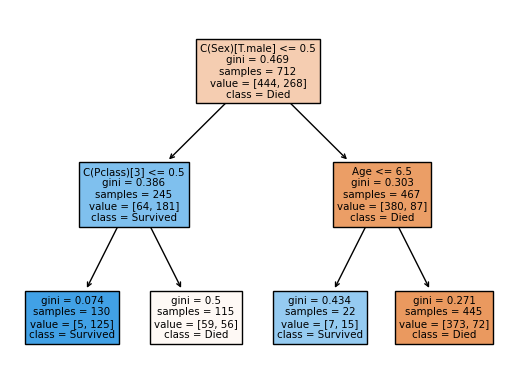

In [33]:
plot_tree(m, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)

Now, change our tree and repeat our process - how does it change your performance and accuracy?  Why?

## Random Forests
That said, this can only ever use one tree. The secret to super powerful tree models are random forests.

In 1994 Berkeley professor Leo Breiman, one year after his retirement, published a small technical report called "Bagging Predictors", which turned out to be one of the most influential ideas in modern machine learning. The report began:

> Bagging predictors is a method for generating multiple versions of a predictor and using these to get an aggregated predictor. The aggregation averages over the versions... The multiple versions are formed by making bootstrap replicates of the learning set and using these as new learning sets. Tests… show that bagging can give substantial gains in accuracy. The vital element is the instability of the prediction method. If perturbing the learning set can cause significant changes in the predictor constructed, then bagging can improve accuracy.

Here is the procedure that Breiman is proposing:

1. Randomly choose a subset of the rows of your data (i.e., "bootstrap replicates of your learning set").
2. Train a model using this subset.
3. Save that model, and then return to step 1 a few times.
4. This will give you a number of trained models. To make a prediction, predict using all of the models, and then take the average of each of those model's predictions.



Because we're using sklearn, moving onto a random forest is really easy!

In [34]:
clf = RandomForestClassifier()
clf.fit(X, y)
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Can you visualise our forest?

Nope.  You can't!  Remember, this is a huge voting 'block', and so isn't easily visualised.  But we can do other things...

A few years ago, ML models were considered "black boxes" - but now, we can do a fair bit more.

In [35]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(clf, X_test)
fi[:10]

,cols,imp
6,Fare,0.313746
7,Age,0.291838
3,C(Sex)[T.male],0.267291
2,C(Pclass)[3],0.054469
0,C(Pclass)[1],0.026955
5,C(Embarked)[T.S],0.022085
1,C(Pclass)[2],0.015213
4,C(Embarked)[T.Q],0.008404


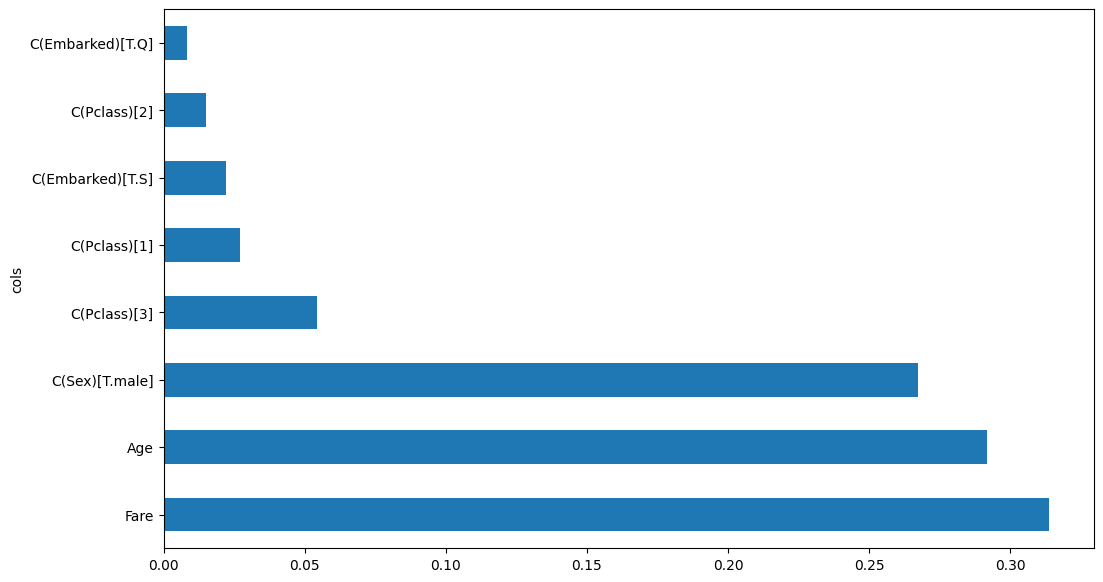

In [36]:

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

We can even explore how these shift, in a non-linear fashion

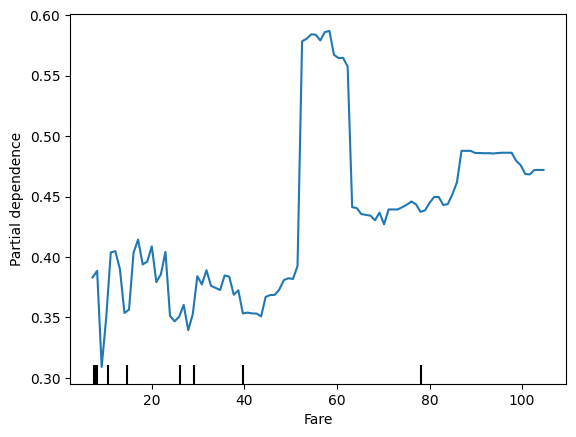

In [37]:
from sklearn.inspection import PartialDependenceDisplay

display = PartialDependenceDisplay.from_estimator(
    clf,
    X_test, features=['Fare'])
display

How might we use this information to improve our model?

### Gradient Boosting

Now, lets apply gradient boosting! While the traditional library used for this is xgboost, sklearn also has its own implementation - can you find it in the docs, and implement it?

In [38]:
xgboost = GradientBoostingClassifier()
xgboost.fit(X, y)
y_preds = xgboost.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## Combining Models


Once again, sklearn has a good, native implementation enabling you to combine your models - can you find it?

In [39]:

#create a dictionary of our models
estimators=[('rf', clf),('decision',m), ('gb', xgboost)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [40]:
ensemble.fit(X, y)
y_preds = ensemble.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.81      0.65      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179



# Where from here?
## Text

https://www.kaggle.com/code/cdeotte/titanic-using-name-only-0-81818

## Pictures!